<a href="https://colab.research.google.com/github/Prerana-Bijekar/DL/blob/main/Practical-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Step 1: Load dataset
X, y = load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2] # BMI feature only

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 2: Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] # add x0 = 1
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
# Step 3: Batch Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = len(X_train_b)


theta = np.random.randn(2, 1) # random initialization


cost_history = []


for iteration in range(n_iterations):
  gradients = 2/m * X_train_b.T.dot(X_train_b.dot(theta) - y_train.reshape(-1, 1))
  theta = theta - eta * gradients
  cost = mean_squared_error(y_train, X_train_b.dot(theta))
  cost_history.append(cost)


print("Learned parameters (Gradient Descent):", theta.ravel())

Learned parameters (Gradient Descent): [153.11649325 358.67163775]


In [ ]:
# Predictions
y_train_pred = X_train_b.dot(theta)
y_test_pred = X_test_b.dot(theta)

In [ ]:
# Performance
print("Train MSE (Gradient Descent):", mean_squared_error(y_train, y_train_pred))
print("Test MSE (Gradient Descent):", mean_squared_error(y_test, y_test_pred))

Train MSE (Gradient Descent): 4766.687606874818
Test MSE (Gradient Descent): 4341.234280918497


In [ ]:
# Step 4: Compare with Normal Equation
theta_normal = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print("Parameters (Normal Equation):", theta_normal)

Parameters (Normal Equation): [152.00335421 998.57768914]


In [ ]:
# Predictions with Normal Equation
y_test_pred_normal = X_test_b.dot(theta_normal)
print("Test MSE (Normal Equation):", mean_squared_error(y_test, y_test_pred_normal))

Test MSE (Normal Equation): 4061.8259284949268


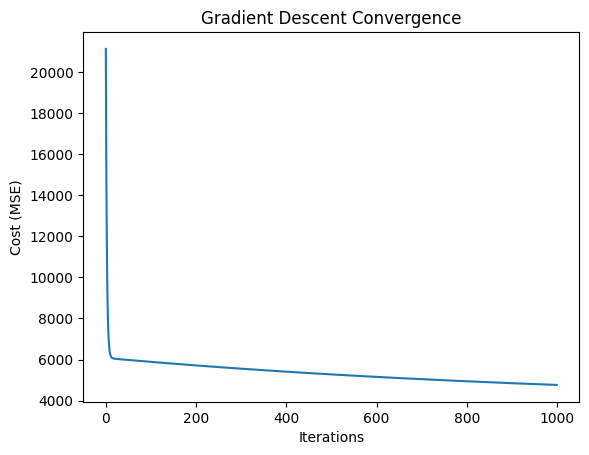

In [ ]:
# Step 5: Plot cost vs iterations
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

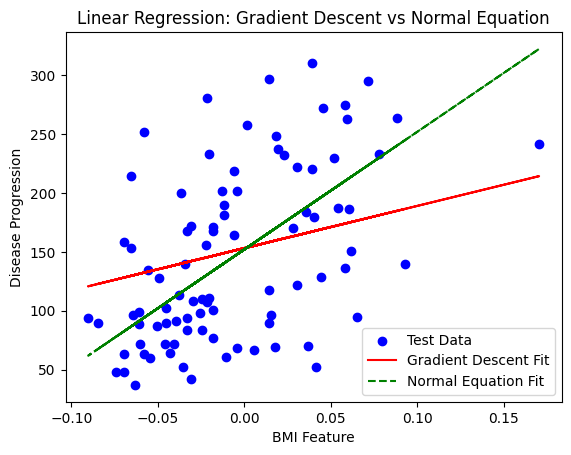

In [ ]:
# Step 6: Plot regression line
plt.scatter(X_test, y_test, color="blue", label="Test Data")
plt.plot(X_test, y_test_pred, color="red", label="Gradient Descent Fit")
plt.plot(X_test, y_test_pred_normal, color="green", linestyle="--", label="Normal Equation Fit")
plt.xlabel("BMI Feature")
plt.ylabel("Disease Progression")
plt.legend()
plt.title("Linear Regression: Gradient Descent vs Normal Equation")
plt.show()